# National Institute of Meteorology

In [116]:
# Data Analysis for Monitoring Meteorological Conditions correlated to fire outbreaks in the Brazilian State of Mato Grosso - MT.

In [117]:
## FILDS                ## DESCRIPTION                             ## UNIT

#  CHUVA                TOTAL PRECIPITATION                          mm
#  RAD_GLO              GLOBAL RADIATION                            KJ/m²
#  VEN_VEL              WIND, TIME SPEED                             m/s
#  VEN_DIR              WIND, TIME DIRECTION (gr)                   °(gr)
#  VEN_RAJ              WIND, MAXIMUM BLAST                          m/s
#  UMD_INS              RELATIVE AIR HUMIDITY, HOURS                  %
#  UMD_MIN              REL. HUMIDITY MIN AT THE TIME BEFORE          %
#  TEM_INS              AIR TEMPERATURE, TIME                        °C
#  TEM_MAX              MAXIMUM TEMPERATURE IN THE PREVIOUS TIME.    °C
#  TEM_MIN              MINIMUM TEMPERATURE IN THE PREVIOUS TIME.    °C

## Weather Stations in Mato Grosso - MT , Brazil.

In [118]:
# source: https://portal.inmet.gov.br/

In [119]:
# [A934] ALTO TAQUARI - MT                              (Avaiable)
# [A933] ITIQUIRA - MT                                  (Avaiable)
# [A932] GUIRATINGA - MT                                (Avaiable)
# [A912] CAMPO VERDE - MT                               (Avaiable)
# [A931] SANTO ANTONIO DO LESTE - MT                    (Avaiable)
# [A915] PARANATINGA - MT                               (Avaiable)
# [A935] PORTO ESTRELA - MT                             (Avaiable)
# [A902] TANGARA DA SERRA - MT                          (Avaiable)
# [A936] SALTO DO CEU - MT                              (Avaiable)       
# [A922] VILA BELA DA SANTISSIMA TRINDADE - MT          (Avaiable)     
# [A908] AGUA BOA - MT                                  (Avaiable) 
# [A930] GAUCHA DO NORTE - MT                           (Avaiable) 
# [A916] QUERENCIA - MT                                 (Avaiable)
# [A921] SAO FELIX DO ARAGUAIA - MT                     (Avaiable)
# [A905] CAMPO NOVO DOS PARECIS - MT                    (Avaiable)
# [A928] NOVA MARINGA - MT                              (Avaiable)
# [A938] VILHENA - RO                                   (Avaiable)
# [A041] MARIANOPOLIS DO TO - TO                        (Avaiable)

### Function to change variable names and timezone to Mato Grosso.

In [120]:
def data_processing(data):
    data = pd.concat([data["DC_NOME"], data["VL_LATITUDE"], data["VL_LONGITUDE"],
                      data["CHUVA"], data["RAD_GLO"], data["VEN_VEL"],
                      data["VEN_DIR"], data["VEN_RAJ"], data["UMD_INS"],
                      data["UMD_MIN"], data["TEM_INS"], data["TEM_MAX"], data["TEM_MIN"],
                      data["DT_MEDICAO"], data["CD_ESTACAO"], data["HR_MEDICAO"]],axis=1)
    
    data.columns = ["Weather Station", "Latitude", "Longitude", "Precipitation (mm)", "Global Radiation (KJ/m²)", 
                    "Wind (Speed)", "Wind (Direction)", "Wind (Blast)", "Relative Air Humidity (%)",
                    "Min. Relative Air Humidity (%)", "Temperature (°C)", "Temperature (Máx.)", 
                    "Temperature (Mín.)", "Timestamp", "Weather Station ID", "Hour"] 

    ## Timezone
    data['Hour'] = data['Hour']/100
    data['Hour'] = data['Hour'].astype(int)
    data['Hour'] = data['Hour'].astype(str) + ':' + '00'
    data['Timestamp'] = data['Timestamp'] + ' ' + data['Hour']
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    data.index  = pd.to_datetime(data.pop('Timestamp'), utc=True)
    data.index  = data.index.tz_convert('America/Cuiaba')
    # Source: http://s.keim.free.fr/tz/tznames.old/America.html
    
    data['Timestamp'] = pd.to_datetime(data.index)
    data['Timestamp'] = data.index.tz_localize(None)
    data.index.name = 'index'
    
    return data

### Loading Weather Stations Historical Data in Mato Grosso along the years.

In [121]:
# This process should take a while because of the number of weather stations and years to be captured.

In [122]:
Year = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]

In [123]:
import pandas as pd 

latitudes = []
longitudes = []
weather_station_names = []

#### #1 ALTO TAQUARI - MT (A934)

In [124]:
Weather_Station = {}
Weather_Station["data_A934"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A934"
        
    if(y == Year[0]):
          Weather_Station["data_A934"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A934"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A934"]
        
# Calling data_processing function

data_A934 = Weather_Station['data_A934']
data_A934 = data_processing(data_A934)

latitudes.append(data_A934.iloc[0, :].Latitude)
longitudes.append(data_A934.iloc[0, :].Longitude)
weather_station_names.append("ALTO TAQUARI - MT")

data_A934.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,2.8,341.0,5.0,84.0,83.0,22.2,22.5,21.7,A934,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,3.1,355.0,4.6,79.0,77.0,21.7,22.2,21.5,A934,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.3,351.0,4.2,83.0,79.0,21.1,21.7,20.8,A934,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.0,13.0,3.3,83.0,83.0,20.9,21.1,20.7,A934,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.1,8.0,3.6,85.0,83.0,20.5,20.8,19.5,A934,4:00,2013-01-01 01:00:00


#### #2 ITIQUIRA - MT (A933)

In [125]:
Weather_Station = {}
Weather_Station["data_A933"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A933"
        
    if(y == Year[0]):
          Weather_Station["data_A933"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A933"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A933"]
        
# Calling data_processing function

data_A933 = Weather_Station['data_A933']
data_A933 = data_processing(data_A933)

latitudes.append(data_A933.iloc[0, :].Latitude)
longitudes.append(data_A933.iloc[0, :].Longitude)
weather_station_names.append("ITIQUIRA - MT")

data_A933.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,ITIQUIRA,-17.175,-54.501667,0.0,-2.9,1.4,106.0,2.3,87.0,81.0,24.7,25.4,24.5,A933,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,ITIQUIRA,-17.175,-54.501667,0.0,-3.1,0.2,142.0,4.9,87.0,86.0,24.0,24.7,24.0,A933,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,ITIQUIRA,-17.175,-54.501667,0.0,-3.4,2.7,95.0,5.3,88.0,86.0,23.3,24.0,23.3,A933,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,ITIQUIRA,-17.175,-54.501667,0.0,-3.5,1.8,41.0,3.7,91.0,88.0,23.2,23.8,23.2,A933,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,ITIQUIRA,-17.175,-54.501667,0.0,-3.5,1.0,332.0,3.5,95.0,91.0,22.6,23.2,22.5,A933,4:00,2013-01-01 01:00:00


#### #3 GUIRATINGA - MT (A932)

In [126]:
Weather_Station = {}
Weather_Station["data_A932"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A932"
        
    if(y == Year[0]):
          Weather_Station["data_A932"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A932"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A932"]
        
# Calling data_processing function

data_A932 = Weather_Station['data_A932']
data_A932 = data_processing(data_A932)

latitudes.append(data_A932.iloc[0, :].Latitude)
longitudes.append(data_A932.iloc[0, :].Longitude)
weather_station_names.append("GUIRATINGA - MT")

data_A932.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,GUIRATINGA,-16.341667,-53.766111,0.0,-3.5,0.9,64.0,4.3,78.0,75.0,24.5,25.1,24.5,A932,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,GUIRATINGA,-16.341667,-53.766111,0.0,-3.5,0.0,110.0,2.8,80.0,77.0,24.2,24.6,24.2,A932,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,GUIRATINGA,-16.341667,-53.766111,0.0,-3.2,0.0,41.0,2.5,80.0,78.0,24.2,24.5,24.1,A932,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,GUIRATINGA,-16.341667,-53.766111,0.0,-3.5,0.0,342.0,0.0,87.0,80.0,23.4,24.2,23.4,A932,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,GUIRATINGA,-16.341667,-53.766111,0.0,-3.5,0.0,291.0,0.0,83.0,81.0,23.6,24.0,23.4,A932,4:00,2013-01-01 01:00:00


#### #4 CAMPO VERDE - MT (A912)

In [128]:
Weather_Station = {}
Weather_Station["data_A912"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A912"
        
    if(y == Year[0]):
          Weather_Station["data_A912"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A912"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A912"]
        
# Calling data_processing function

data_A912 = Weather_Station['data_A912']
data_A912 = data_processing(data_A912)

latitudes.append(data_A912.iloc[0, :].Latitude)
longitudes.append(data_A912.iloc[0, :].Longitude)
weather_station_names.append("CAMPO VERDE - MT")

data_A912.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,CAMPO VERDE,-15.531389,-55.135556,0.0,-3.5,2.8,306.0,4.0,89.0,83.0,21.4,22.0,21.4,A912,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,CAMPO VERDE,-15.531389,-55.135556,0.0,-3.5,2.2,294.0,4.1,87.0,86.0,22.2,22.2,21.4,A912,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,CAMPO VERDE,-15.531389,-55.135556,0.0,-3.5,2.2,290.0,3.8,88.0,84.0,22.1,22.5,22.0,A912,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,CAMPO VERDE,-15.531389,-55.135556,0.0,-3.4,2.6,262.0,3.7,87.0,86.0,21.8,22.2,21.7,A912,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,CAMPO VERDE,-15.531389,-55.135556,0.0,-3.5,1.4,294.0,4.1,85.0,84.0,21.8,22.1,21.7,A912,4:00,2013-01-01 01:00:00


#### #5 SANTO ANTONIO DO LESTE - MT (A931)

In [129]:
Weather_Station = {}
Weather_Station["data_A931"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A931"
        
    if(y == Year[0]):
          Weather_Station["data_A931"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A931"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A931"]
        
# Calling data_processing function

data_A931 = Weather_Station['data_A931']
data_A931 = data_processing(data_A931)

latitudes.append(data_A931.iloc[0, :].Latitude)
longitudes.append(data_A931.iloc[0, :].Longitude)
weather_station_names.append("SANTO ANTONIO DO LESTE - MT")

data_A931.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,SANTO ANTONIO DO LESTE,-14.927778,-53.883611,0.0,-3.5,0.0,244.0,4.0,82.0,82.0,23.2,23.2,22.4,A931,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,SANTO ANTONIO DO LESTE,-14.927778,-53.883611,0.0,-3.4,0.0,134.0,1.8,88.0,82.0,22.0,23.2,22.0,A931,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,SANTO ANTONIO DO LESTE,-14.927778,-53.883611,0.0,-3.5,0.0,141.0,0.0,91.0,88.0,21.1,22.1,21.1,A931,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,SANTO ANTONIO DO LESTE,-14.927778,-53.883611,0.0,-3.5,0.0,129.0,0.0,93.0,91.0,21.1,21.3,20.7,A931,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,SANTO ANTONIO DO LESTE,-14.927778,-53.883611,0.0,-3.5,0.0,123.0,0.0,91.0,90.0,20.7,21.8,20.7,A931,4:00,2013-01-01 01:00:00


#### #6 PARANATINGA - MT (A915)

In [130]:
Weather_Station = {}
Weather_Station["data_A915"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A915"
        
    if(y == Year[0]):
          Weather_Station["data_A915"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A915"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A915"]
        
# Calling data_processing function

data_A915 = Weather_Station['data_A915']
data_A915 = data_processing(data_A915)

latitudes.append(data_A915.iloc[0, :].Latitude)
longitudes.append(data_A915.iloc[0, :].Longitude)
weather_station_names.append("PARANATINGA - MT")

data_A915.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,PARANATINGA,-14.421389,-54.036111,0.0,-3.5,0.7,111.0,2.1,91.0,88.0,22.6,23.0,22.5,A915,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,PARANATINGA,-14.421389,-54.036111,0.0,-3.5,0.9,236.0,1.9,91.0,90.0,22.6,22.7,22.5,A915,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,PARANATINGA,-14.421389,-54.036111,0.0,-3.5,0.0,199.0,1.6,93.0,91.0,22.3,22.7,22.3,A915,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,PARANATINGA,-14.421389,-54.036111,0.0,-3.5,0.4,346.0,1.3,95.0,93.0,21.8,22.3,21.8,A915,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,PARANATINGA,-14.421389,-54.036111,0.0,-3.4,0.1,160.0,1.6,95.0,95.0,21.7,21.9,21.6,A915,4:00,2013-01-01 01:00:00


#### #7 PORTO ESTRELA - MT (A935)

In [132]:
Weather_Station = {}
Weather_Station["data_A935"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A935"
        
    if(y == Year[0]):
          Weather_Station["data_A935"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A935"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A935"]
        
# Calling data_processing function

data_A935 = Weather_Station['data_A935']
data_A935 = data_processing(data_A935)

latitudes.append(data_A935.iloc[0, :].Latitude)
longitudes.append(data_A935.iloc[0, :].Longitude)
weather_station_names.append("PORTO ESTRELA - MT")

data_A935.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,PORTO ESTRELA,-15.324722,-57.225833,0.2,-3.1,0.8,273.0,3.2,91.0,80.0,23.4,24.3,23.3,A935,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,PORTO ESTRELA,-15.324722,-57.225833,0.2,-3.5,0.9,17.0,2.1,91.0,89.0,23.4,23.4,23.3,A935,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,PORTO ESTRELA,-15.324722,-57.225833,0.8,-2.8,0.1,33.0,1.8,94.0,91.0,23.7,23.7,23.4,A935,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,PORTO ESTRELA,-15.324722,-57.225833,0.2,-2.4,0.3,321.0,1.6,94.0,94.0,23.8,24.0,23.7,A935,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,PORTO ESTRELA,-15.324722,-57.225833,0.4,-2.5,0.0,356.0,1.1,94.0,94.0,24.0,24.1,23.8,A935,4:00,2013-01-01 01:00:00


#### #8 TANGARA DA SERRA - MT (A902)

In [133]:
Weather_Station = {}
Weather_Station["data_A902"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A902"
        
    if(y == Year[0]):
          Weather_Station["data_A902"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A902"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A902"]
        
# Calling data_processing function

data_A902 = Weather_Station['data_A902']
data_A902 = data_processing(data_A902)

latitudes.append(data_A902.iloc[0, :].Latitude)
longitudes.append(data_A902.iloc[0, :].Longitude)
weather_station_names.append("TANGARA DA SERRA - MT")

data_A902.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,TANGARÁ DA SERRA,-14.65,-57.431667,1.4,-3.4,2.0,8.0,4.3,94.0,91.0,22.7,23.1,22.7,A902,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,TANGARÁ DA SERRA,-14.65,-57.431667,0.0,-2.9,0.0,43.0,2.8,93.0,92.0,22.9,23.0,22.7,A902,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,TANGARÁ DA SERRA,-14.65,-57.431667,0.0,-2.5,0.9,234.0,1.8,94.0,92.0,22.9,23.1,22.9,A902,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,TANGARÁ DA SERRA,-14.65,-57.431667,0.0,-2.4,0.6,276.0,1.6,94.0,93.0,23.0,23.1,22.8,A902,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,TANGARÁ DA SERRA,-14.65,-57.431667,0.0,-2.8,0.2,211.0,1.3,93.0,93.0,23.0,23.1,22.9,A902,4:00,2013-01-01 01:00:00


#### #9 SALTO DO CEU - MT (A936)

In [134]:
Weather_Station = {}
Weather_Station["data_A936"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A936"
        
    if(y == Year[0]):
          Weather_Station["data_A936"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A936"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A936"]
        
# Calling data_processing function

data_A936 = Weather_Station['data_A936']
data_A936 = data_processing(data_A936)

latitudes.append(data_A936.iloc[0, :].Latitude)
longitudes.append(data_A936.iloc[0, :].Longitude)
weather_station_names.append("SALTO DO CEU - MT")

data_A936.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,SALTO DO CEU,-15.124722,-58.127222,0.0,-3.3,1.2,234.0,4.0,84.0,72.0,25.0,26.2,24.6,A936,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,SALTO DO CEU,-15.124722,-58.127222,0.0,-3.5,1.8,5.0,6.3,81.0,78.0,25.0,26.0,24.9,A936,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,SALTO DO CEU,-15.124722,-58.127222,0.2,-3.5,1.6,346.0,3.5,86.0,81.0,24.2,25.0,24.1,A936,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,SALTO DO CEU,-15.124722,-58.127222,0.0,-3.5,2.0,359.0,4.1,87.0,86.0,24.0,24.3,23.9,A936,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,SALTO DO CEU,-15.124722,-58.127222,0.0,-3.5,1.8,360.0,4.5,85.0,84.0,24.1,24.4,23.9,A936,4:00,2013-01-01 01:00:00


#### #10 VILA BELA DA SANTISSIMA TRINDADE - MT (A922)

In [135]:
Weather_Station = {}
Weather_Station["data_A922"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A922"
        
    if(y == Year[0]):
          Weather_Station["data_A922"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A922"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A922"]
        
# Calling data_processing function

data_A922 = Weather_Station['data_A922']
data_A922 = data_processing(data_A922)

latitudes.append(data_A922.iloc[0, :].Latitude)
longitudes.append(data_A922.iloc[0, :].Longitude)
weather_station_names.append("VILA BELA DA SANTISSIMA TRINDADE - MT")

data_A922.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,VILA BELA DA SANTÍSSIMA TRINDADE,-15.062778,-59.873056,0.0,-2.9,0.0,42.0,0.0,86.0,81.0,26.5,27.0,26.4,A922,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,VILA BELA DA SANTÍSSIMA TRINDADE,-15.062778,-59.873056,0.0,-3.1,0.0,7.0,0.0,83.0,78.0,26.0,26.7,26.0,A922,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,VILA BELA DA SANTÍSSIMA TRINDADE,-15.062778,-59.873056,0.0,-3.0,0.0,237.0,0.0,90.0,81.0,25.3,26.0,25.3,A922,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,VILA BELA DA SANTÍSSIMA TRINDADE,-15.062778,-59.873056,0.0,-3.3,0.0,336.0,0.5,91.0,90.0,24.9,25.3,24.9,A922,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,VILA BELA DA SANTÍSSIMA TRINDADE,-15.062778,-59.873056,0.0,-3.3,0.0,4.0,0.5,85.0,85.0,25.6,25.7,24.9,A922,4:00,2013-01-01 01:00:00


#### #11 AGUA BOA - MT (A908)

In [136]:
Weather_Station = {}
Weather_Station["data_A908"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A908"
        
    if(y == Year[0]):
          Weather_Station["data_A908"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A908"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A908"]
        
# Calling data_processing function

data_A908 = Weather_Station['data_A908']
data_A908 = data_processing(data_A908)

latitudes.append(data_A908.iloc[0, :].Latitude)
longitudes.append(data_A908.iloc[0, :].Longitude)
weather_station_names.append("AGUA BOA - MT")

data_A908.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,ÁGUA BOA,-14.016389,-52.211667,0.0,-2.8,1.8,243.0,3.0,94.0,92.0,23.0,23.1,22.9,A908,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,ÁGUA BOA,-14.016389,-52.211667,0.0,-2.6,2.4,231.0,3.4,94.0,94.0,22.7,23.0,22.7,A908,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,ÁGUA BOA,-14.016389,-52.211667,0.0,-3.0,2.0,292.0,3.4,94.0,93.0,22.6,22.7,22.4,A908,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,ÁGUA BOA,-14.016389,-52.211667,0.0,-3.0,1.8,290.0,2.9,94.0,93.0,22.4,22.7,22.4,A908,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,ÁGUA BOA,-14.016389,-52.211667,0.0,-2.8,1.2,278.0,2.7,93.0,93.0,22.5,22.5,22.4,A908,4:00,2013-01-01 01:00:00


#### #12 GAUCHA DO NORTE - MT (A930)

In [137]:
Weather_Station = {}
Weather_Station["data_A930"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A930"
        
    if(y == Year[0]):
          Weather_Station["data_A930"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A930"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A930"]
        
# Calling data_processing function

data_A930 = Weather_Station['data_A930']
data_A930 = data_processing(data_A930)

latitudes.append(data_A930.iloc[0, :].Latitude)
longitudes.append(data_A930.iloc[0, :].Longitude)
weather_station_names.append("GAUCHA DO NORTE - MT")

data_A930.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,GAUCHA DO NORTE,-13.184722,-53.2575,0.0,-2.2,1.1,236.0,2.5,90.0,89.0,22.3,22.9,22.3,A930,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,GAUCHA DO NORTE,-13.184722,-53.2575,0.0,-3.1,0.0,248.0,2.4,90.0,90.0,22.5,22.6,22.3,A930,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,GAUCHA DO NORTE,-13.184722,-53.2575,0.0,-2.9,0.0,239.0,1.2,92.0,90.0,22.2,22.5,22.1,A930,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,GAUCHA DO NORTE,-13.184722,-53.2575,0.0,-2.4,0.0,285.0,1.9,90.0,90.0,22.5,22.5,22.2,A930,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,GAUCHA DO NORTE,-13.184722,-53.2575,0.0,-2.0,0.2,297.0,1.3,90.0,89.0,22.7,22.8,22.5,A930,4:00,2013-01-01 01:00:00


#### #13 QUERENCIA - MT (A916)

In [138]:
Weather_Station = {}
Weather_Station["data_A916"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A916"
        
    if(y == Year[0]):
          Weather_Station["data_A916"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A916"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A916"]
        
# Calling data_processing function

data_A916 = Weather_Station['data_A916']
data_A916 = data_processing(data_A916)

latitudes.append(data_A916.iloc[0, :].Latitude)
longitudes.append(data_A916.iloc[0, :].Longitude)
weather_station_names.append("QUERENCIA - MT")

data_A916.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,QUERÊNCIA,-12.603056,-52.1625,0.0,-3.5,0.7,252.0,1.8,92.0,88.0,22.8,23.4,22.8,A916,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,QUERÊNCIA,-12.603056,-52.1625,0.0,-3.5,0.0,220.0,1.4,93.0,91.0,22.4,23.0,22.4,A916,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,QUERÊNCIA,-12.603056,-52.1625,0.0,-3.5,1.4,220.0,3.0,94.0,93.0,21.7,22.4,21.7,A916,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,QUERÊNCIA,-12.603056,-52.1625,0.0,-3.5,1.5,224.0,2.2,94.0,94.0,21.5,21.7,21.4,A916,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,QUERÊNCIA,-12.603056,-52.1625,0.0,-3.5,0.5,150.0,2.2,94.0,94.0,21.4,21.5,21.3,A916,4:00,2013-01-01 01:00:00


#### #14 SAO FELIX DO ARAGUAIA - MT (A921)

In [139]:
Weather_Station = {}
Weather_Station["data_A921"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A921"
        
    if(y == Year[0]):
          Weather_Station["data_A921"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A921"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A921"]
        
# Calling data_processing function

data_A921 = Weather_Station['data_A921']
data_A921 = data_processing(data_A921)

latitudes.append(data_A921.iloc[0, :].Latitude)
longitudes.append(data_A921.iloc[0, :].Longitude)
weather_station_names.append("SAO FELIX DO ARAGUAIA - MT")

data_A921.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,SÃO FELIX DO ARAGUAIA,-11.618889,-50.727778,0.0,-3.5,0.5,69.0,6.3,77.0,67.0,25.6,26.5,25.6,A921,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,SÃO FELIX DO ARAGUAIA,-11.618889,-50.727778,0.0,-3.5,1.1,155.0,1.9,80.0,75.0,25.0,25.6,24.5,A921,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,SÃO FELIX DO ARAGUAIA,-11.618889,-50.727778,0.0,-3.3,2.3,177.0,3.9,83.0,79.0,24.2,25.1,24.1,A921,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,SÃO FELIX DO ARAGUAIA,-11.618889,-50.727778,0.0,-3.5,2.3,171.0,4.3,83.0,83.0,24.2,24.2,23.9,A921,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,SÃO FELIX DO ARAGUAIA,-11.618889,-50.727778,0.0,-3.5,2.2,163.0,3.9,84.0,83.0,23.9,24.2,23.8,A921,4:00,2013-01-01 01:00:00


#### #15 CAMPO NOVO DOS PARECIS - MT (A905)

In [140]:
Weather_Station = {}
Weather_Station["data_A905"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A905"
        
    if(y == Year[0]):
          Weather_Station["data_A905"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A905"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A905"]
        
# Calling data_processing function

data_A905 = Weather_Station['data_A905']
data_A905 = data_processing(data_A905)

latitudes.append(data_A905.iloc[0, :].Latitude)
longitudes.append(data_A905.iloc[0, :].Longitude)
weather_station_names.append("CAMPO NOVO DOS PARECIS  - MT")

data_A905.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,CAMPO NOVO DOS PARECIS,-13.785833,-57.838611,1.8,5.6,0.5,199.0,1.7,94.0,93.0,20.3,20.5,20.0,A905,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,CAMPO NOVO DOS PARECIS,-13.785833,-57.838611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A905,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,CAMPO NOVO DOS PARECIS,-13.785833,-57.838611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A905,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,CAMPO NOVO DOS PARECIS,-13.785833,-57.838611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A905,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,CAMPO NOVO DOS PARECIS,-13.785833,-57.838611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A905,4:00,2013-01-01 01:00:00


#### #16 NOVA MARINGA - MT (A928)

In [141]:
Weather_Station = {}
Weather_Station["data_A928"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A928"
        
    if(y == Year[0]):
          Weather_Station["data_A928"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A928"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A928"]
        
# Calling data_processing function

data_A928 = Weather_Station['data_A928']
data_A928 = data_processing(data_A928)

latitudes.append(data_A928.iloc[0, :].Latitude)
longitudes.append(data_A928.iloc[0, :].Longitude)
weather_station_names.append("NOVA MARINGA - MT")

data_A928.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,NOVA MARINGA,-13.038611,-57.092222,0.0,-3.4,0.0,165.0,2.3,92.0,91.0,23.7,23.9,23.7,A928,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,NOVA MARINGA,-13.038611,-57.092222,0.0,-2.9,0.0,80.0,1.2,92.0,92.0,23.8,23.8,23.7,A928,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,NOVA MARINGA,-13.038611,-57.092222,0.0,-2.6,0.0,347.0,1.4,92.0,92.0,23.7,23.8,23.6,A928,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,NOVA MARINGA,-13.038611,-57.092222,0.0,-2.8,0.0,164.0,0.0,93.0,92.0,23.6,23.7,23.5,A928,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,NOVA MARINGA,-13.038611,-57.092222,0.0,-3.2,0.0,193.0,0.0,93.0,93.0,23.2,23.6,23.2,A928,4:00,2013-01-01 01:00:00


#### #17 VILHENA - RO (A938)

In [142]:
Weather_Station = {}
Weather_Station["data_A938"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A938"
        
    if(y == Year[0]):
          Weather_Station["data_A938"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A938"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A938"]
        
# Calling data_processing function

data_A938 = Weather_Station['data_A938']
data_A938 = data_processing(data_A938)

latitudes.append(data_A938.iloc[0, :].Latitude)
longitudes.append(data_A938.iloc[0, :].Longitude)
weather_station_names.append("VILHENA - RO")

data_A938.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,VILHENA,-12.735,-60.157778,0.0,-3.5,1.2,76.0,3.7,81.0,77.0,24.7,24.9,24.5,A938,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,VILHENA,-12.735,-60.157778,0.0,-3.5,0.7,73.0,2.3,84.0,81.0,24.3,24.7,23.7,A938,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,VILHENA,-12.735,-60.157778,0.0,-3.5,2.1,81.0,3.5,84.0,83.0,24.1,24.5,24.1,A938,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,VILHENA,-12.735,-60.157778,0.0,-3.4,2.2,93.0,4.7,85.0,84.0,23.7,24.1,23.7,A938,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,VILHENA,-12.735,-60.157778,0.0,-3.5,0.8,29.0,3.5,87.0,83.0,23.1,23.8,23.1,A938,4:00,2013-01-01 01:00:00


#### #18 MARIANOPOLIS DO TO - TO (A041)

In [143]:
Weather_Station = {}
Weather_Station["data_A041"] = []

for y in Year:
        
    path = f"https://apitempo.inmet.gov.br//estacao//{y}-01-01//{y}-12-31//A041"
        
    if(y == Year[0]):
          Weather_Station["data_A041"] = pd.read_json(path)
        
    else:
          Weather_Station["data_A041"] = pd.concat([Actual, pd.read_json(path)])
        
    Actual = Weather_Station["data_A041"]
        
# Calling data_processing function

data_A041 = Weather_Station['data_A041']
data_A041 = data_processing(data_A041)

latitudes.append(data_A041.iloc[0, :].Latitude)
longitudes.append(data_A041.iloc[0, :].Longitude)
weather_station_names.append("MARIANOPOLIS DO TO - TO")

data_A041.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,MARIANÓPOLIS DO TO,-9.576389,-49.723333,0.0,-3.5,0.6,24.0,2.2,89.0,77.0,25.4,26.7,25.4,A041,0:00,2012-12-31 21:00:00
2012-12-31 22:00:00-03:00,MARIANÓPOLIS DO TO,-9.576389,-49.723333,0.0,-3.5,0.7,54.0,1.6,92.0,87.0,24.6,25.4,24.6,A041,1:00,2012-12-31 22:00:00
2012-12-31 23:00:00-03:00,MARIANÓPOLIS DO TO,-9.576389,-49.723333,0.0,-3.5,0.3,302.0,1.3,90.0,86.0,24.5,24.9,24.2,A041,2:00,2012-12-31 23:00:00
2013-01-01 00:00:00-03:00,MARIANÓPOLIS DO TO,-9.576389,-49.723333,0.0,-3.3,0.4,313.0,0.8,89.0,88.0,24.7,24.7,24.3,A041,3:00,2013-01-01 00:00:00
2013-01-01 01:00:00-03:00,MARIANÓPOLIS DO TO,-9.576389,-49.723333,0.0,-3.5,0.3,306.0,1.8,86.0,80.0,24.3,25.1,24.3,A041,4:00,2013-01-01 01:00:00


### Visualizing Weather Stations along Mato Grosso.

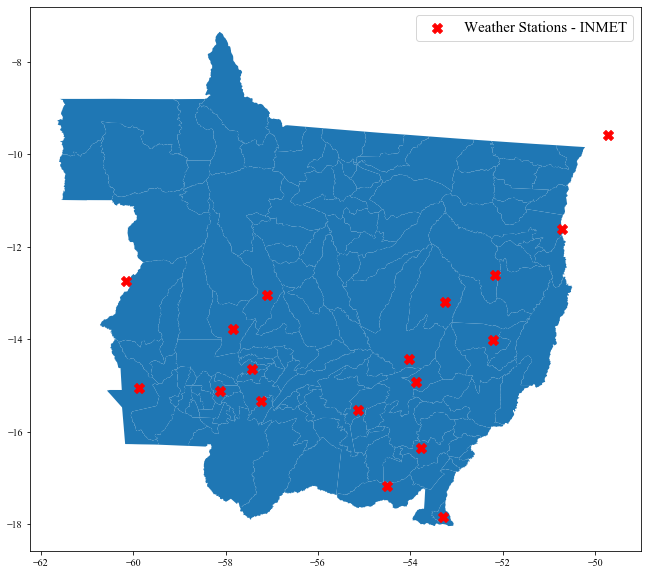

In [145]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import spearmanr

import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

import pytz
import geopandas as gpd
import matplotlib.pyplot as plt

dfInmet = pd.DataFrame([weather_station_names, latitudes, longitudes]).T
dfInmet.columns = ["name", "lat", "log"]
basesInmet = [Point(xy) for xy in zip(dfInmet.log, dfInmet.lat)]
geo_df = gdp.GeoDataFrame(dfInmet, geometry=basesInmet)

plt.rcParams['font.family'] = 'Times New Roman'
mapa = gpd.read_file("MT_Municipios_2021.shp")

fig, ax = plt.subplots(figsize=(15,10))
mapa.plot(ax=ax)

geo_df.plot(ax=ax, marker = "X", markersize=100, color="red", label="Weather Stations - INMET")

plt.legend(loc="upper right", fontsize=15)

### Complementing Missing Data with Neighboring Bases.

In [178]:
import pandas as pd

latitudes = []
longitudes = []
weather_station_names = []

latitudes.append(data_A934.iloc[0, :].Latitude)
longitudes.append(data_A934.iloc[0, :].Longitude)
weather_station_names.append("data_A934")

latitudes.append(data_A933.iloc[0, :].Latitude)
longitudes.append(data_A933.iloc[0, :].Longitude)
weather_station_names.append("data_A933")

latitudes.append(data_A932.iloc[0, :].Latitude)
longitudes.append(data_A932.iloc[0, :].Longitude)
weather_station_names.append("data_A932")

latitudes.append(data_A912.iloc[0, :].Latitude)
longitudes.append(data_A912.iloc[0, :].Longitude)
weather_station_names.append("data_A912")

latitudes.append(data_A931.iloc[0, :].Latitude)
longitudes.append(data_A931.iloc[0, :].Longitude)
weather_station_names.append("data_A931")

latitudes.append(data_A915.iloc[0, :].Latitude)
longitudes.append(data_A915.iloc[0, :].Longitude)
weather_station_names.append("data_A915")

latitudes.append(data_A935.iloc[0, :].Latitude)
longitudes.append(data_A935.iloc[0, :].Longitude)
weather_station_names.append("data_A935")

latitudes.append(data_A902.iloc[0, :].Latitude)
longitudes.append(data_A902.iloc[0, :].Longitude)
weather_station_names.append("data_A902")

latitudes.append(data_A936.iloc[0, :].Latitude)
longitudes.append(data_A936.iloc[0, :].Longitude)
weather_station_names.append("data_A936")

latitudes.append(data_A922.iloc[0, :].Latitude)
longitudes.append(data_A922.iloc[0, :].Longitude)
weather_station_names.append("data_A922")

latitudes.append(data_A908.iloc[0, :].Latitude)
longitudes.append(data_A908.iloc[0, :].Longitude)
weather_station_names.append("data_A908")
                   
latitudes.append(data_A930.iloc[0, :].Latitude)
longitudes.append(data_A930.iloc[0, :].Longitude)
weather_station_names.append("data_A930")

latitudes.append(data_A916.iloc[0, :].Latitude)
longitudes.append(data_A916.iloc[0, :].Longitude)
weather_station_names.append("data_A916")

latitudes.append(data_A921.iloc[0, :].Latitude)
longitudes.append(data_A921.iloc[0, :].Longitude)
weather_station_names.append("data_A921")

latitudes.append(data_A905.iloc[0, :].Latitude)
longitudes.append(data_A905.iloc[0, :].Longitude)
weather_station_names.append("data_A905")
                   
latitudes.append(data_A928.iloc[0, :].Latitude)
longitudes.append(data_A928.iloc[0, :].Longitude)
weather_station_names.append("data_A928")
                   
latitudes.append(data_A938.iloc[0, :].Latitude)
longitudes.append(data_A938.iloc[0, :].Longitude)
weather_station_names.append("data_A938")
                   
latitudes.append(data_A041.iloc[0, :].Latitude)
longitudes.append(data_A041.iloc[0, :].Longitude)
weather_station_names.append("data_A041")

In [154]:
print(weather_station_names)

['data_A934', 'data_A933', 'data_A932', 'data_A912', 'data_A931', 'data_A915', 'data_A935', 'data_A902', 'data_A936', 'data_A922', 'data_A908', 'data_A930', 'data_A916', 'data_A921', 'data_A905', 'data_A928', 'data_A938', 'data_A041']


In [179]:
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')

weather_station_names = weather_station_names
dfInmet = pd.DataFrame([weather_station_names, latitudes, longitudes]).T
dfInmet.columns = ["name", "lat", "log"]
basesInmet = [Point(xy) for xy in zip(dfInmet.log, dfInmet.lat)]
geo_df2 = gdp.GeoDataFrame(dfInmet, geometry=basesInmet)
loc_weather_station = [geo_df2.loc[geo_df2.name == name, "geometry"].tolist()[0] for name in weather_station_names]
name_loc_inmet_dict = dict(zip(weather_station_names, loc_weather_station))

def finding_neighbors(point_org, names, points):
    nexts = []
    for name_dst, point_dst in zip(names, points):
        pnt1 = point_org
        pnt2 = point_dst
        points_df = gdp.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
        points_df = points_df.to_crs('EPSG:5234')
        points_df2 = points_df.shift() # shift the dataframe by 1 to align pnt1 with pnt2
        nexts.append((name_dst, points_df.distance(points_df2)[1]))
    return sorted(nexts, key = lambda x: x[1])

def completing_neighbors(dict_name_loc, name, dataframe):
    df_full = dataframe.copy()
    loc = dict_name_loc[name]
    neighbors = finding_neighbors(loc, dict_name_loc.keys(), dict_name_loc.values())
    for neighbor, dst in neighbors:
        df_filling = eval(neighbor).copy()
        df_filling.columns  = df_full.columns.values
        df_full = df_full.combine_first(df_filling)
    return df_full

In [160]:
# [A934] ALTO TAQUARI - MT            
dfA934_filled = completing_neighbors(name_loc_inmet_dict, "data_A934", data_A934)
dfA934_filled.to_csv (r'Data_Alto_Taquari.csv', sep=";", encoding='latin-1', index = False, header = True)

In [161]:
# [A933] ITIQUIRA - MT           
dfA933_filled = completing_neighbors(name_loc_inmet_dict, "data_A933", data_A933)
dfA933_filled.to_csv (r'Data_Itiquira.csv', sep=";", encoding='latin-1', index = False, header = True)

In [162]:
# [A932] GUIRATINGA - MT          
dfA932_filled = completing_neighbors(name_loc_inmet_dict, "data_A932", data_A932)
dfA932_filled.to_csv (r'Data_Guiratinga.csv', sep=";", encoding='latin-1', index = False, header = True)

In [163]:
# [A912] CAMPO VERDE - MT         
dfA912_filled = completing_neighbors(name_loc_inmet_dict, "data_A912", data_A912)
dfA912_filled.to_csv (r'Data_Campo_Verde.csv', sep=";", encoding='latin-1', index = False, header = True)

In [164]:
# [A931] SANTO ANTONIO DO LESTE - MT        
dfA931_filled = completing_neighbors(name_loc_inmet_dict, "data_A931", data_A931)
dfA931_filled.to_csv (r'Data_Santo_Antonio_do_Leste.csv', sep=";", encoding='latin-1', index = False, header = True)

In [165]:
# [A915] PARANATINGA - MT         
dfA915_filled = completing_neighbors(name_loc_inmet_dict, "data_A915", data_A915)
dfA915_filled.to_csv (r'Data_Paratinga.csv', sep=";", encoding='latin-1', index = False, header = True)

In [166]:
# [A935] PORTO ESTRELA - MT       
dfA935_filled = completing_neighbors(name_loc_inmet_dict, "data_A935", data_A935)
dfA935_filled.to_csv (r'Data_Porto_Estrela.csv', sep=";", encoding='latin-1', index = False, header = True)

In [167]:
# [A902] TANGARA DA SERRA - MT      
dfA902_filled = completing_neighbors(name_loc_inmet_dict, "data_A902", data_A902)
dfA902_filled.to_csv (r'Data_Tangara_da_Serra.csv', sep=";", encoding='latin-1', index = False, header = True)

In [168]:
# [A936] SALTO DO CEU - MT      
dfA936_filled = completing_neighbors(name_loc_inmet_dict, "data_A936", data_A936)
dfA936_filled.to_csv (r'Data_Salto_do_Ceu.csv', sep=";", encoding='latin-1', index = False, header = True)

In [169]:
# [A922] VILA BELA DA SANTISSIMA TRINDADE - MT      
dfA922_filled = completing_neighbors(name_loc_inmet_dict, "data_A922", data_A922)
dfA922_filled.to_csv (r'Data_Vila_Bela_da_Santissima_Trindade.csv', sep=";", encoding='latin-1', index = False, header = True)

In [170]:
# [A908] AGUA BOA - MT     
dfA908_filled = completing_neighbors(name_loc_inmet_dict, "data_A908", data_A908)
dfA908_filled.to_csv (r'Data_Agua_Boa.csv', sep=";", encoding='latin-1', index = False, header = True)

In [171]:
# [A930] GAUCHA DO NORTE - MT     
dfA930_filled = completing_neighbors(name_loc_inmet_dict, "data_A930", data_A930)
dfA930_filled.to_csv (r'Data_Gaucha_do_Norte.csv', sep=";", encoding='latin-1', index = False, header = True)

In [172]:
# [A916] QUERENCIA - MT    
dfA916_filled = completing_neighbors(name_loc_inmet_dict, "data_A916", data_A916)
dfA916_filled.to_csv (r'Data_Querencia.csv', sep=";", encoding='latin-1', index = False, header = True)

In [173]:
# [A921] SAO FELIX DO ARAGUAIA - MT  
dfA921_filled = completing_neighbors(name_loc_inmet_dict, "data_A921", data_A921)
dfA921_filled.to_csv (r'Data_Sao_Felix_do_Araguaia.csv', sep=";", encoding='latin-1', index = False, header = True)

In [174]:
# [A905] CAMPO NOVO DOS PARECIS - MT  
dfA905_filled = completing_neighbors(name_loc_inmet_dict, "data_A905", data_A905)
dfA905_filled.to_csv (r'Data_Campo_Novo_dos_Parecis.csv', sep=";", encoding='latin-1', index = False, header = True)

In [175]:
# [A928] NOVA MARINGA - MT 
dfA928_filled = completing_neighbors(name_loc_inmet_dict, "data_A928", data_A928)
dfA928_filled.to_csv (r'Data_Nova_Maringa.csv', sep=";", encoding='latin-1', index = False, header = True)

In [176]:
# [A938] VILHENA - RO  
dfA938_filled = completing_neighbors(name_loc_inmet_dict, "data_A938", data_A938)
dfA938_filled.to_csv (r'Data_Vilhena.csv', sep=";", encoding='latin-1', index = False, header = True)

In [177]:
# [A041] MARIANOPOLIS DO TO - TO
dfA041_filled = completing_neighbors(name_loc_inmet_dict, "data_A041", data_A041)
dfA041_filled.to_csv (r'Data_Marianopolis_do_To.csv', sep=";", encoding='latin-1', index = False, header = True)

## Grouping characteristics for 24 hours.

In [183]:
inmet= pd.concat([dfA934_filled, dfA933_filled, dfA932_filled, dfA912_filled, dfA931_filled, dfA915_filled,
                  dfA935_filled, dfA902_filled, dfA936_filled, dfA922_filled, dfA908_filled, dfA930_filled,
                  dfA916_filled, dfA921_filled, dfA905_filled, dfA928_filled, dfA938_filled, dfA041_filled])

In [184]:
inmet.columns

Index(['Weather Station', 'Latitude', 'Longitude', 'Precipitation (mm)',
       'Global Radiation (KJ/m²)', 'Wind (Speed)', 'Wind (Direction)',
       'Wind (Blast)', 'Relative Air Humidity (%)',
       'Min. Relative Air Humidity (%)', 'Temperature (°C)',
       'Temperature (Máx.)', 'Temperature (Mín.)', 'Weather Station ID',
       'Hour', 'Timestamp'],
      dtype='object')

In [185]:
## Grouping characteristics

# 'Weather Station' : 'max'
# 'Latitude' : 'max'
# 'Longitude' : 'max'
# 'Precipitation (mm)' : 'sum'
# 'Global Radiation (KJ/m²)' : 'max'
# 'Wind (Speed)' : 'max' 
# 'Wind (Direction)' : 'mean'
# 'Wind (Blast)' : 'max'
# 'Relative Air Humidity (%)' : 'min'
# 'Min. Relative Air Humidity (%)' : 'min'
# 'Temperature (°C)' : 'mean'
# 'Temperature (Máx.)' : 'max'
# 'Temperature (Mín.)' : 'min'
# 'Weather Station ID':'max'
# 'Hour':'max'
# 'Timestamp' : 'max'

In [197]:
inmet['Timestamp'] = inmet['Timestamp'].dt.strftime('%Y-%m-%d')

inmet.head()

,Weather Station,Latitude,Longitude,Precipitation (mm),Global Radiation (KJ/m²),Wind (Speed),Wind (Direction),Wind (Blast),Relative Air Humidity (%),Min. Relative Air Humidity (%),Temperature (°C),Temperature (Máx.),Temperature (Mín.),Weather Station ID,Hour,Timestamp
index,,,,,,,,,,,,,,,,
2012-12-31 21:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,2.8,341.0,5.0,84.0,83.0,22.2,22.5,21.7,A934,0:00,2012-12-31
2012-12-31 22:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,3.1,355.0,4.6,79.0,77.0,21.7,22.2,21.5,A934,1:00,2012-12-31
2012-12-31 23:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.3,351.0,4.2,83.0,79.0,21.1,21.7,20.8,A934,2:00,2012-12-31
2013-01-01 00:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.0,13.0,3.3,83.0,83.0,20.9,21.1,20.7,A934,3:00,2013-01-01
2013-01-01 01:00:00-03:00,ALTO TAQUARI,-17.841111,-53.289444,0.0,-3.5,1.1,8.0,3.6,85.0,83.0,20.5,20.8,19.5,A934,4:00,2013-01-01


In [201]:
inmet_group = inmet.groupby(['Timestamp','Weather Station'])\
.agg({'Latitude':'max','Longitude':'max','Precipitation (mm)':'sum','Global Radiation (KJ/m²)':'max',
      'Wind (Speed)':'max','Wind (Direction)':'mean','Wind (Blast)':'max','Relative Air Humidity (%)':'min',
      'Min. Relative Air Humidity (%)':'min','Temperature (°C)':'mean','Temperature (Máx.)':'max',
      'Temperature (Mín.)':'min','Weather Station ID':'max','Hour':'max'})

inmet_group = pd.DataFrame(inmet_group)

del inmet_group['Hour']

inmet_group.head()

Latitude  Longitude  Precipitation (mm)  \
Timestamp  Weather Station                                                    
2012-12-31 ALTO TAQUARI           -17.841111 -53.289444                 0.0   
           CAMPO NOVO DOS PARECIS -13.785833 -57.838611                 1.8   
           CAMPO VERDE            -15.531389 -55.135556                 0.0   
           GAUCHA DO NORTE        -13.184722 -53.257500                 0.0   
           GUIRATINGA             -16.341667 -53.766111                 0.0   

                                   Global Radiation (KJ/m²)  Wind (Speed)  \
Timestamp  Weather Station                                                  
2012-12-31 ALTO TAQUARI                                -3.5           3.1   
           CAMPO NOVO DOS PARECIS                       5.6           0.9   
           CAMPO VERDE                                 -3.5           2.8   
           GAUCHA DO NORTE                             -2.2           1.1   
           GUIRATINGA                                  -3.2           0.9   

                                   Wind (Direction)  Wind (Blast)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                  349.000000           5.0   
           CAMPO NOVO DOS PARECIS        158.666667           2.8   
           CAMPO VERDE                   296.666667           4.1   
           GAUCHA DO NORTE               241.000000           2.5   
           GUIRATINGA                     71.666667           4.3   

                                   Relative Air Humidity (%)  \
Timestamp  Weather Station                                     
2012-12-31 ALTO TAQUARI                                 79.0   
           CAMPO NOVO DOS PARECIS                       93.0   
           CAMPO VERDE                                  87.0   
           GAUCHA DO NORTE                              90.0   
           GUIRATINGA                                   78.0   

                                   Min. Relative Air Humidity (%)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                                      77.0   
           CAMPO NOVO DOS PARECIS                            92.0   
           CAMPO VERDE                                       83.0   
           GAUCHA DO NORTE                                   89.0   
           GUIRATINGA                                        75.0   

                                   Temperature (°C)  Temperature (Máx.)  \
Timestamp  Weather Station                                                
2012-12-31 ALTO TAQUARI                   21.666667                22.5   
           CAMPO NOVO DOS PARECIS         22.033333                23.1   
           CAMPO VERDE                    21.900000                22.5   
           GAUCHA DO NORTE                22.333333                22.9   
           GUIRATINGA                     24.300000                25.1   

                                   Temperature (Mín.) Weather Station ID  
Timestamp  Weather Station                                                
2012-12-31 ALTO TAQUARI                          20.8               A934  
           CAMPO NOVO DOS PARECIS                20.0               A905  
           CAMPO VERDE                           21.4               A912  
           GAUCHA DO NORTE                       22.1               A930  
           GUIRATINGA                            24.1               A932

## Rain Categorization 

In [207]:
# Categorization based on http://alertario.rio.rj.gov.br/

In [204]:
precipitation = inmet_group.loc[:,['Precipitation (mm)']].values
precipitation_type = []

for i in range(len(inmet_group['Precipitation (mm)'])):
    
    if(precipitation[i]==0):
        precipitation_type.append("Without rain")  
               
    else:
        if(precipitation[i]<5):
            precipitation_type.append("Light rain")
               
        if((precipitation[i]>=5) & (precipitation[i]<=25)):
            precipitation_type.append("Moderate rain")
               
        if((precipitation[i]>25) & (precipitation[i]<=50)):
            precipitation_type.append("Heavy rain")
               
        if(precipitation[i]>50):
            precipitation_type.append("Very heavy rain")

inmet_group["Precipitation type"] = precipitation_type
inmet_group.head()

Latitude  Longitude  Precipitation (mm)  \
Timestamp  Weather Station                                                    
2012-12-31 ALTO TAQUARI           -17.841111 -53.289444                 0.0   
           CAMPO NOVO DOS PARECIS -13.785833 -57.838611                 1.8   
           CAMPO VERDE            -15.531389 -55.135556                 0.0   
           GAUCHA DO NORTE        -13.184722 -53.257500                 0.0   
           GUIRATINGA             -16.341667 -53.766111                 0.0   

                                   Global Radiation (KJ/m²)  Wind (Speed)  \
Timestamp  Weather Station                                                  
2012-12-31 ALTO TAQUARI                                -3.5           3.1   
           CAMPO NOVO DOS PARECIS                       5.6           0.9   
           CAMPO VERDE                                 -3.5           2.8   
           GAUCHA DO NORTE                             -2.2           1.1   
           GUIRATINGA                                  -3.2           0.9   

                                   Wind (Direction)  Wind (Blast)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                  349.000000           5.0   
           CAMPO NOVO DOS PARECIS        158.666667           2.8   
           CAMPO VERDE                   296.666667           4.1   
           GAUCHA DO NORTE               241.000000           2.5   
           GUIRATINGA                     71.666667           4.3   

                                   Relative Air Humidity (%)  \
Timestamp  Weather Station                                     
2012-12-31 ALTO TAQUARI                                 79.0   
           CAMPO NOVO DOS PARECIS                       93.0   
           CAMPO VERDE                                  87.0   
           GAUCHA DO NORTE                              90.0   
           GUIRATINGA                                   78.0   

                                   Min. Relative Air Humidity (%)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                                      77.0   
           CAMPO NOVO DOS PARECIS                            92.0   
           CAMPO VERDE                                       83.0   
           GAUCHA DO NORTE                                   89.0   
           GUIRATINGA                                        75.0   

                                   Temperature (°C)  Temperature (Máx.)  \
Timestamp  Weather Station                                                
2012-12-31 ALTO TAQUARI                   21.666667                22.5   
           CAMPO NOVO DOS PARECIS         22.033333                23.1   
           CAMPO VERDE                    21.900000                22.5   
           GAUCHA DO NORTE                22.333333                22.9   
           GUIRATINGA                     24.300000                25.1   

                                   Temperature (Mín.) Weather Station ID  \
Timestamp  Weather Station                                                 
2012-12-31 ALTO TAQUARI                          20.8               A934   
           CAMPO NOVO DOS PARECIS                20.0               A905   
           CAMPO VERDE                           21.4               A912   
           GAUCHA DO NORTE                       22.1               A930   
           GUIRATINGA                            24.1               A932   

                                  Precipitation type  
Timestamp  Weather Station                            
2012-12-31 ALTO TAQUARI                 Without rain  
           CAMPO NOVO DOS PARECIS         Light rain  
           CAMPO VERDE                  Without rain  
           GAUCHA DO NORTE              Without rain  
           GUIRATINGA                   Without rain

## Temperature Categorization

In [208]:
# Categorization based on http://alertario.rio.rj.gov.br/

In [205]:
temperature = inmet_group.loc[:,['Temperature (Máx.)']].values
temperature_type = []

for i in range(len(inmet_group['Temperature (Máx.)'])):
    
    if(i==0):
        temperature_type.append("Stable") 
    
    if(i>0):
        if(abs(temperature[i]-temperature[i-1]) <= 2.9 ):
            temperature_type.append("Stable")
       
        else:
            if((temperature[i]-temperature[i-1]) < 0 ):
                temperature_type.append("Decline")
            
            if((temperature[i]-temperature[i-1]) > 0 ):
                temperature_type.append("Elevation")
                
inmet_group["Temperature type"] = temperature_type
inmet_group.head()

Latitude  Longitude  Precipitation (mm)  \
Timestamp  Weather Station                                                    
2012-12-31 ALTO TAQUARI           -17.841111 -53.289444                 0.0   
           CAMPO NOVO DOS PARECIS -13.785833 -57.838611                 1.8   
           CAMPO VERDE            -15.531389 -55.135556                 0.0   
           GAUCHA DO NORTE        -13.184722 -53.257500                 0.0   
           GUIRATINGA             -16.341667 -53.766111                 0.0   

                                   Global Radiation (KJ/m²)  Wind (Speed)  \
Timestamp  Weather Station                                                  
2012-12-31 ALTO TAQUARI                                -3.5           3.1   
           CAMPO NOVO DOS PARECIS                       5.6           0.9   
           CAMPO VERDE                                 -3.5           2.8   
           GAUCHA DO NORTE                             -2.2           1.1   
           GUIRATINGA                                  -3.2           0.9   

                                   Wind (Direction)  Wind (Blast)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                  349.000000           5.0   
           CAMPO NOVO DOS PARECIS        158.666667           2.8   
           CAMPO VERDE                   296.666667           4.1   
           GAUCHA DO NORTE               241.000000           2.5   
           GUIRATINGA                     71.666667           4.3   

                                   Relative Air Humidity (%)  \
Timestamp  Weather Station                                     
2012-12-31 ALTO TAQUARI                                 79.0   
           CAMPO NOVO DOS PARECIS                       93.0   
           CAMPO VERDE                                  87.0   
           GAUCHA DO NORTE                              90.0   
           GUIRATINGA                                   78.0   

                                   Min. Relative Air Humidity (%)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                                      77.0   
           CAMPO NOVO DOS PARECIS                            92.0   
           CAMPO VERDE                                       83.0   
           GAUCHA DO NORTE                                   89.0   
           GUIRATINGA                                        75.0   

                                   Temperature (°C)  Temperature (Máx.)  \
Timestamp  Weather Station                                                
2012-12-31 ALTO TAQUARI                   21.666667                22.5   
           CAMPO NOVO DOS PARECIS         22.033333                23.1   
           CAMPO VERDE                    21.900000                22.5   
           GAUCHA DO NORTE                22.333333                22.9   
           GUIRATINGA                     24.300000                25.1   

                                   Temperature (Mín.) Weather Station ID  \
Timestamp  Weather Station                                                 
2012-12-31 ALTO TAQUARI                          20.8               A934   
           CAMPO NOVO DOS PARECIS                20.0               A905   
           CAMPO VERDE                           21.4               A912   
           GAUCHA DO NORTE                       22.1               A930   
           GUIRATINGA                            24.1               A932   

                                  Precipitation type Temperature type  
Timestamp  Weather Station                                             
2012-12-31 ALTO TAQUARI                 Without rain           Stable  
           CAMPO NOVO DOS PARECIS         Light rain           Stable  
           CAMPO VERDE                  Without rain           Stable  
           GAUCHA DO NORTE              Without rain           Stable  
           GUIRATINGA             

## Wind Categorization

In [209]:
# Categorization based on http://alertario.rio.rj.gov.br/

In [206]:
# Transforming Velocity to Km/h
inmet_group["Wind (Speed)"] = inmet_group["Wind (Speed)"]*3.6

wind = inmet_group.loc[:,["Wind (Speed)"]].values
wind_type = []

for i in range(len(inmet_group["Wind (Speed)"])):
    
    if(wind[i]<=18.4):
        wind_type.append("Weak")
        
    if((wind[i]>18.5) & (wind[i]<=51.9)):
        wind_type.append("Moderate")
        
    if((wind[i]>51.9) & (wind[i]<=75.9)):
        wind_type.append("Strong")
        
    if(wind[i]>75.9):
        wind_type.append("Very strong")
        
inmet_group["Wind type"] = wind_type
inmet_group.head()

Latitude  Longitude  Precipitation (mm)  \
Timestamp  Weather Station                                                    
2012-12-31 ALTO TAQUARI           -17.841111 -53.289444                 0.0   
           CAMPO NOVO DOS PARECIS -13.785833 -57.838611                 1.8   
           CAMPO VERDE            -15.531389 -55.135556                 0.0   
           GAUCHA DO NORTE        -13.184722 -53.257500                 0.0   
           GUIRATINGA             -16.341667 -53.766111                 0.0   

                                   Global Radiation (KJ/m²)  Wind (Speed)  \
Timestamp  Weather Station                                                  
2012-12-31 ALTO TAQUARI                                -3.5         11.16   
           CAMPO NOVO DOS PARECIS                       5.6          3.24   
           CAMPO VERDE                                 -3.5         10.08   
           GAUCHA DO NORTE                             -2.2          3.96   
           GUIRATINGA                                  -3.2          3.24   

                                   Wind (Direction)  Wind (Blast)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                  349.000000           5.0   
           CAMPO NOVO DOS PARECIS        158.666667           2.8   
           CAMPO VERDE                   296.666667           4.1   
           GAUCHA DO NORTE               241.000000           2.5   
           GUIRATINGA                     71.666667           4.3   

                                   Relative Air Humidity (%)  \
Timestamp  Weather Station                                     
2012-12-31 ALTO TAQUARI                                 79.0   
           CAMPO NOVO DOS PARECIS                       93.0   
           CAMPO VERDE                                  87.0   
           GAUCHA DO NORTE                              90.0   
           GUIRATINGA                                   78.0   

                                   Min. Relative Air Humidity (%)  \
Timestamp  Weather Station                                          
2012-12-31 ALTO TAQUARI                                      77.0   
           CAMPO NOVO DOS PARECIS                            92.0   
           CAMPO VERDE                                       83.0   
           GAUCHA DO NORTE                                   89.0   
           GUIRATINGA                                        75.0   

                                   Temperature (°C)  Temperature (Máx.)  \
Timestamp  Weather Station                                                
2012-12-31 ALTO TAQUARI                   21.666667                22.5   
           CAMPO NOVO DOS PARECIS         22.033333                23.1   
           CAMPO VERDE                    21.900000                22.5   
           GAUCHA DO NORTE                22.333333                22.9   
           GUIRATINGA                     24.300000                25.1   

                                   Temperature (Mín.) Weather Station ID  \
Timestamp  Weather Station                                                 
2012-12-31 ALTO TAQUARI                          20.8               A934   
           CAMPO NOVO DOS PARECIS                20.0               A905   
           CAMPO VERDE                           21.4               A912   
           GAUCHA DO NORTE                       22.1               A930   
           GUIRATINGA                            24.1               A932   

                                  Precipitation type Temperature type  \
Timestamp  Weather Station                                              
2012-12-31 ALTO TAQUARI                 Without rain           Stable   
           CAMPO NOVO DOS PARECIS         Light rain           Stable   
           CAMPO VERDE                  Without rain           Stable   
           GAUCHA DO NORTE              Without rain           Stable   
           GUIRATINGA       

In [210]:
# Salvar
inmet_group.to_csv (r'National Institute of Meteorology.csv', sep=";", encoding='latin-1', index = False, header = True)